# Task 4 of Second Machine Learning Homework
## Polynomial Regression Extension

**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.

**Dataset**: Use the following code to create a dataset of 100 samples:

```py
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon
```

### Main function for task - polymonial regression

In [57]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def train_polynomial_regression(X, y, degree=3, num_epochs=1000, lr=0.1):
    class PolynomialRegressionModel(torch.nn.Module):
        def __init__(self, input_dim):
            super(PolynomialRegressionModel, self).__init__()
            self.poly = torch.nn.Linear(input_dim, 1)

        def forward(self, x):
            return self.poly(x)
        
    # Normalize the input between 0 and 1
    X_min, X_max = X.min(), X.max()
    X_scaled = (X - X_min) / (X_max - X_min)
    
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    
    # Create polynomial features (degree 3)
    X_poly = torch.cat([X_tensor**i for i in range(1, degree + 1)], dim=1)

    model = PolynomialRegressionModel(degree)

    # Define MSE loss and optimizer functions
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Save min loss
    min_loss = float('inf')

    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_poly)
        loss = criterion(y_pred, y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if loss.item() < min_loss:
            min_loss = loss.item()

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model, X_min, X_max, min_loss


### Linear regression to compare - similar function to task 2

In [61]:
def train_linear_regression(X, y, num_epochs=1000, lr=0.1):
    class LinearRegressionModel(torch.nn.Module):
        def __init__(self):
            super(LinearRegressionModel, self).__init__()
            self.linear = torch.nn.Linear(1, 1)

        def forward(self, x):
            return self.linear(x)
        
    
    # Normalize the input between 0 and 1
    X_min, X_max = X.min(), X.max()
    X_scaled = (X - X_min) / (X_max - X_min)
    
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    model = LinearRegressionModel()

    # Define MSE loss and optimizer functions
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Save min loss
    min_loss = float('inf')

    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if loss.item() < min_loss:
            min_loss = loss.item()

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model, X_min, X_max, min_loss


### Train models and generate the plot

Epoch [1000/35000], Loss: 2988.7993
Epoch [2000/35000], Loss: 2423.5693
Epoch [3000/35000], Loss: 1965.2412
Epoch [4000/35000], Loss: 1593.5978
Epoch [5000/35000], Loss: 1292.2418
Epoch [6000/35000], Loss: 1047.8816
Epoch [7000/35000], Loss: 849.7388
Epoch [8000/35000], Loss: 689.0689
Epoch [9000/35000], Loss: 558.7854
Epoch [10000/35000], Loss: 453.1429
Epoch [11000/35000], Loss: 367.4807
Epoch [12000/35000], Loss: 298.0197
Epoch [13000/35000], Loss: 241.6959
Epoch [14000/35000], Loss: 196.0254
Epoch [15000/35000], Loss: 158.9904
Epoch [16000/35000], Loss: 128.9604
Epoch [17000/35000], Loss: 104.6098
Epoch [18000/35000], Loss: 84.8645
Epoch [19000/35000], Loss: 68.8538
Epoch [20000/35000], Loss: 55.8708
Epoch [21000/35000], Loss: 45.3429
Epoch [22000/35000], Loss: 36.8054
Epoch [23000/35000], Loss: 29.8834
Epoch [24000/35000], Loss: 24.2707
Epoch [25000/35000], Loss: 19.7185
Epoch [26000/35000], Loss: 16.0278
Epoch [27000/35000], Loss: 13.0344
Epoch [28000/35000], Loss: 10.6073
Epoch 

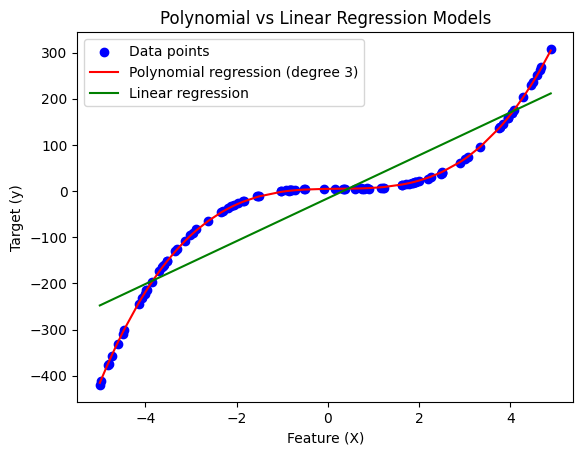

Polynomial learned coefficients: [ 2370.6794 -4471.21    2820.3345]
Polynomial learned bias: -415.3812
Polynomial min loss: 2.5979
Linear learned coefficient: 459.2059
Linear learned bias: -247.7313
Linear min loss: 3616.3906


In [63]:
# Seed for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Dataset
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

# Train
poly_model, X_min, X_max, poly_min_loss = train_polynomial_regression(X, y, 3, 35000, 0.5)
linear_model, _, _, linear_min_loss = train_linear_regression(X, y, 35000, 0.5)

# Plot
X_sorted = np.sort(X)
X_scaled_sorted = (X_sorted - X_min) / (X_max - X_min)

# Create polynomial features for sorted X values (degree 3)
X_poly_sorted = torch.cat([torch.tensor(X_scaled_sorted, dtype=torch.float32).view(-1, 1)**i for i in range(1, 4)], dim=1)
predicted_y_poly = poly_model(X_poly_sorted).detach().numpy()

# Linear regression prediction
X_tensor_sorted = torch.tensor(X_scaled_sorted, dtype=torch.float32).view(-1, 1)
predicted_y_linear = linear_model(X_tensor_sorted).detach().numpy()

# Plotting
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_sorted, predicted_y_poly, color='red', label='Polynomial regression (degree 3)')
plt.plot(X_sorted, predicted_y_linear, color='green', label='Linear regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial vs Linear Regression Models')
plt.legend()
plt.show()

# Print learned parameters
poly_weights = poly_model.poly.weight.detach().numpy().flatten()
poly_bias = poly_model.poly.bias.item()
print(f"Polynomial learned coefficients: {poly_weights}")
print(f"Polynomial learned bias: {poly_bias:.4f}")
print(f"Polynomial min loss: {poly_min_loss:.4f}")


linear_weights = linear_model.linear.weight.detach().numpy().flatten()
linear_bias = linear_model.linear.bias.item()
print(f"Linear learned coefficient: {linear_weights[0]:.4f}")
print(f"Linear learned bias: {linear_bias:.4f}")
print(f"Linear min loss: {linear_min_loss:.4f}")



### Conclusions

I needed way more epochs (and also increased learning rate a little bit).

Loss is way lower -> it is basically neccessary to have at least similar power to interpolate correctly.

